Compare speed and accuracy of different emulators for quick likelihood evaluation.

In [1]:
params = {
    'omega_matter'  :  0.315,
    'sigma8'        :  0.83,
    'omega_baryon'  :  0.05,
    'ns'            :  0.96,
    'hubble'        :  0.67,
    'neutrino_mass' :  0.0,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  1
}

In [2]:
import baccoemu #https://bacco.dipc.org/baccoemu_docs/index.html#quickstart
emulator = baccoemu.Matter_powerspectrum()

Loading linear emulator...
Linear emulator loaded in memory.
Loading non-linear emulator...


/home/tkarim/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/home/tkarim/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/tkarim/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
k, Q = emulator.get_nonlinear_boost(params)
k, pk = emulator.get_linear_pk(params, k=k)
k, pknl = emulator.get_nonlinear_pk(params, baryonic_boost=False)

In [4]:
import matplotlib.pyplot as plt

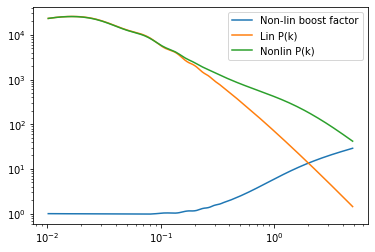

In [5]:
plt.loglog(k, Q, label = 'Non-lin boost factor')
plt.loglog(k, pk, label = 'Lin P(k)')
plt.loglog(k, pknl, label = 'Nonlin P(k)')
plt.legend(loc = 'best')

In [6]:
%time k, pknl = emulator.get_nonlinear_pk(params, baryonic_boost=False)

CPU times: user 55.8 ms, sys: 15.1 ms, total: 70.8 ms
Wall time: 77.6 ms


In [7]:
#import skylens default power spectra
from skylens.power_spectra import *
from astropy.cosmology import Planck15 as planck15

In [8]:
params_skylens = {
    'Om'            : params['omega_matter'],
    'Omd'           : params['omega_matter'] - params['omega_baryon'],
    'sigma8'        : 0.83,
    'Omb'           : params['omega_baryon'],
    'ns'            : 0.96,
    'h'             : params['hubble'],
    'mnu'           : params['neutrino_mass'],
    'w'             : params['w0'],
    'wa'            : 0.0,
    'expfactor'     : 1,
    'T_cmb'         : planck15.Tcmb0.value,
    'Neff'          : planck15.Neff,
    'tau'           : 0.06 #FIXME skylens
}

pk_params = {'non_linear':1,
             'kmax':30,
             'kmin':3.e-4,
             'nk':500,
             'scenario':'dmo',
             'pk_func':emulator.get_nonlinear_pk,
             'halofit_version':'takahashi'}

In [ ]:
def baccoemu_pk(z,cosmo_params=None,pk_params=None,return_s8=False):
    k, pknl = emulator.get_nonlinear_pk(coordinates=cosmo_params, baryonic_boost=False)
    
    return pknlh3, kh

In [15]:
%time kcamb, pkcamb = baccoemu.matter_powerspectrum.compute_camb_pk(params)

CPU times: user 8.88 s, sys: 2.52 ms, total: 8.88 s
Wall time: 609 ms


# EuclidEmulator2

In [40]:
import euclidemu2 as ee2
import numpy as np

In [41]:
cosmo_par = {'As':2.1e-09, 'ns':0.966, 'Omb':0.04, 'Omm':0.3, 'h':0.68, 'mnu':0.15, 'w':-1.0, 'wa':0.0}

In [42]:
redshifts = [0]
k, b = ee2.get_boost(cosmo_par,redshifts)

In [55]:
k_custom = np.geomspace(1e-3,10,1000)
k, b = ee2.get_boost(cosmo_par,redshifts,k_custom)

EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes beyond k_max = 9.41h/Mpc. 
Higher k modes constantly extrapolated.
EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.


In [51]:
k, pnl, plin, b = ee2.get_pnonlin(cosmo_par, redshifts, k_custom)

In [52]:
k.shape

(1000,)

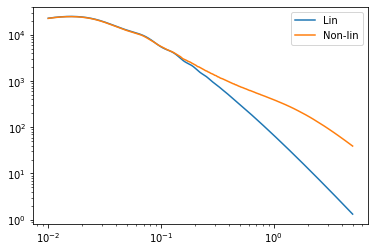

In [53]:
plt.loglog(k, plin[0], label = 'Lin')
plt.loglog(k, pnl[0], label = 'Non-lin')
plt.legend(loc = 'best')

In [54]:
%time k, pnl, plin, b = ee2.get_pnonlin(cosmo_par, redshifts, k_custom)

CPU times: user 5.53 s, sys: 180 ms, total: 5.71 s
Wall time: 384 ms
